In [1]:
import polars as pl
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import requests
from helpers import download_unzip

## Loading the data

In [ ]:
# See LICENSE.md
url = "https://datahub.admiralty.co.uk/portal/sharing/rest/content/items/60c0908526b844a68494c038a457e1a7/data"
txt_file = download_unzip(url, "downloads/")

In [ ]:
df = pl.read_csv(
    txt_file, separator='\t', quote_char='"', encoding='latin1', infer_schema_length=10000000,  null_values=[""] )
print(len(df))
print(df.schema)
df.describe()

100495
Schema({'wreck_id': Int64, 'wreck_category': String, 'obstruction_category': String, 'status': String, 'classification': String, 'position': String, 'latitude': String, 'longitude': String, 'horizontal_datum': String, 'limits': String, 'position_method': String, 'depth': Float64, 'height': Float64, 'depth_method': String, 'depth_quality': String, 'depth_accuracy': Float64, 'water_depth': Int64, 'water_level_effect': String, 'vertical_datum': String, 'reported_year': String, 'name': String, 'type': String, 'flag': String, 'length': Float64, 'width': Float64, 'draught': Float64, 'sonar_length': Float64, 'sonar_width': Float64, 'shadow_height': Float64, 'orientation': Float64, 'tonnage': Int64, 'tonnage_type': String, 'cargo': String, 'conspic_visual': String, 'conspic_radar': String, 'date_sunk': String, 'non_sub_contact': Int64, 'bottom_texture': String, 'scour_dimensions': String, 'debris_field': String, 'original_sensor': String, 'last_sensor': String, 'original_detection_year'

statistic,wreck_id,wreck_category,obstruction_category,status,classification,position,latitude,longitude,horizontal_datum,limits,position_method,depth,height,depth_method,depth_quality,depth_accuracy,water_depth,water_level_effect,vertical_datum,reported_year,name,type,flag,length,width,draught,sonar_length,sonar_width,shadow_height,orientation,tonnage,tonnage_type,cargo,conspic_visual,conspic_radar,date_sunk,non_sub_contact,bottom_texture,scour_dimensions,debris_field,original_sensor,last_sensor,original_detection_year,last_detection_year,original_source,markers,circumstances_of_loss,surveying_details,general_comments,last_amended_date
str,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,str,str,f64,f64,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64
"""count""",100495.0,"""67504""","""16151""","""35653""","""0""","""100495""","""100495""","""100495""","""100495""","""1450""","""24680""",39549.0,162.0,"""17615""","""100397""",131.0,100427.0,"""100247""","""99187""","""0""","""28134""","""37626""","""20417""",14845.0,12471.0,10880.0,13536.0,12228.0,13341.0,13707.0,17602.0,"""16818""","""9361""","""99145""","""99129""","""21500""",1230.0,"""22181""","""4270""","""561""","""100408""","""76473""","""100441""","""76442""","""100410""","""2691""","""89241""","""89252""","""19923""",100328.0
"""null_count""",0.0,"""32991""","""84344""","""64842""","""100495""","""0""","""0""","""0""","""0""","""99045""","""75815""",60946.0,100333.0,"""82880""","""98""",100364.0,68.0,"""248""","""1308""","""100495""","""72361""","""62869""","""80078""",85650.0,88024.0,89615.0,86959.0,88267.0,87154.0,86788.0,82893.0,"""83677""","""91134""","""1350""","""1366""","""78995""",99265.0,"""78314""","""96225""","""99934""","""87""","""24022""","""54""","""24053""","""85""","""97804""","""11254""","""11243""","""80572""",167.0
"""mean""",50832.029504,null,null,null,null,null,null,null,null,null,null,29.250057,4.021111,null,null,1.059542,110.116393,null,null,null,null,null,null,74.559933,12.29899,6.018539,96083.48905,12.01091,4.053674,103.479861,2918.340245,null,null,null,null,null,1.0,null,null,null,null,null,null,null,null,null,null,null,null,2.0128e7
"""std""",29577.854028,null,null,null,null,null,null,null,null,null,null,57.541481,4.99839,null,null,1.001904,478.964464,null,null,null,null,null,null,48.60775,6.463541,3.925245,1.1174e7,13.077841,5.024552,78.37569,8616.94359,null,null,null,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,90179.982321
"""min""",1.0,"""dangerous wreck""","""Anchor""","""Live""",null,"""0 0 N,145 0 E""","""0 0 N""","""0 0 E""","""WGD 2""","""2,2 101.3235798,3.103159 101.3…","""Air photography""",-21.0,0.1,"""UNKNOWN""","""UNKNOWN""",0.1,-10.0,"""Always under water/submerged""","""Approximate Lowest Astronomica…",null,"""""t"" Vliegent Hart""","""Anchor""","""?ANTIGUAN""",0.9,0.5,0.3,0.0,0.0,-11.66,0.0,1.0,"""builders' measurement""","""aircraft""","""not visually conspicuous""","""not radar conspicuous""","""14390107""",1.0,"""1,17""",""" 0078.0,,003.0,135""","""0002.4,180""","""LIDAR""","""LIDAR""","""0.89""","""11/06/2022""","""Lloyd's and Marine Underwriter…","""""253B"" G CONL LT BUOY, FL.G""",""" """,""" """,""" """,1.9240328e7
"""25%""",25244.0,null,null,null,null,null,null,null,null,null,null,7.17,1.12,null,null,0.3,6.0,null,null,null,null,null,null,37.5,8.2,3.7,13.09,5.0,1.36,45.0,283.0,null,null,null,null,null,1.0,null,null,null,null,null,null,null,null,null,null,null,null,2.0070619e7
"""50%""",50615.0,null,null,null,null,null,null,null,null,null,null,16.2,2.11,null,null,1.0,18.0,null,null,null,null,null,null,69.8,11.3,5.4,32.4,9.0,3.0,90.0,1056.0,null,null,null,null,null,1.0,null,null,null,null,null,null,null,null,null,null,null,null,2.0151007e7
"""75%""",76105.0,null,null,null,null,null,null,null,null,null,null,35.0,5.0,null,null,1.5,49.0,null,null,null,null,null,null,102.1,15.3,7.6,65.0,15.2,5.6,142.0,3127.0

### Process string columnns

In [4]:
for col in ["general_comments", "surveying_details", "circumstances_of_loss"]:
    df = df.with_columns(pl.col(col).str.strip_chars().replace("", None))

### Process dates

In [5]:
cols = ["date_sunk", "original_detection_year"]

exprs = []
for col in cols:
    out = col if col.endswith("year") else f"{col}_year"

    cleaned = (
        pl.col(col)
        .str.replace(r"\D+", "", literal=False)
        .str.replace(r"^0+", "", literal=False)
        .str.slice(0, 4)
        .cast(pl.Int64, strict=False)
    )
    if col == "original_detection_year":
        capped = (
            pl.when((cleaned > 2025) | (cleaned < 1800))
            .then(None)
            .otherwise(cleaned)
            .alias(out)
        )
    else:
        capped = (
            pl.when(cleaned > 2025)
            .then(None)
            .otherwise(cleaned)
            .alias(out)
        ) 
        
    exprs.append(capped)
    df = df.filter(pl.col(col).is_not_null())
df = df.with_columns(exprs)


### Process distance columns

In [6]:
cols = ["water_depth","depth"]


for col in cols:
    df = df.with_columns((pl.col(col)/3.28084).alias(col))

df = df.filter(pl.col('water_depth') >= 0)

In [7]:
df["wreck_category"].value_counts(sort=True)

wreck_category,count
str,u32
"""non-dangerous wreck""",9746
"""dangerous wreck""",7901
"""wreck showing any portion of h…",2151
null,1041
"""distributed remains of wreck""",197
"""wreck showing mast/masts""",108


In [8]:
df["status"].value_counts(sort=True)

status,count
str,u32
null,14229
"""dead""",5567
"""lifted""",1051
"""historic""",182
"""Not Fully Surveyed""",53
"""Not Fully Surveyed, existence …",36
"""existence doubtful""",20
"""historic, Not Fully Surveyed""",3
"""Live""",3


In [9]:
df["water_depth"].describe()

statistic,value
str,f64
"""count""",21144.0
"""null_count""",0.0
"""mean""",95.461976
"""std""",273.591484
"""min""",0.0
"""25%""",3.048
"""50%""",9.144
"""75%""",23.469599
"""max""",2164.079931


In [10]:
df["original_source"].value_counts(sort=True)

original_source,count
str,u32
"""Lloyd's and Marine Underwriter…",6715
"""other""",4029
"""national HO/authority notice t…",2134
"""national coast guard or patrol""",1163
"""national HO/authority wreck in…",1013
…,…
"""aerial photography or satellit…",14
"""owner/operator""",9
"""national HO/authority files""",6


In [11]:
df["date_sunk_year"].value_counts(sort=True)

date_sunk_year,count
i64,u32
1917,1448
1940,1232
1918,1062
1941,680
1916,563
…,…
1706,1
1781,1
1746,1


In [12]:
df["original_detection_year"].value_counts(sort=True)

original_detection_year,count
i64,u32
1917,1058
1940,1048
1918,943
1941,601
1976,581
…,…
1836,1
1810,1
1862,1


In [13]:
df.filter(pl.col("general_comments").is_not_null()).select("general_comments").sample(10).to_series().to_list()

['INTACT',
 'INTACT, UPRIGHT, BOWS W',
 'INTER-ISLAND VESSEL',
 'WOODEN HULL',
 'IRON HULL',
 'See Also: 23986',
 'See Also: 60259',
 'WELL BROKEN UP',
 'INTACT, COLLAPSED',
 'INTACT, ON STBD SIDE, BOWS NW, SOME NETS ON WK']

In [14]:
df.filter(pl.col("surveying_details").is_not_null()).select("surveying_details").sample(10).to_series().to_list()

['H4169/87   14.11.90   SCUTTLED SW (?SE) OF ARENDAL ON 31.12.46. (F LAURIN, 18.10.90). NCA.        29.10.98   POSN GIVEN AS 581331.5N, 094105.7E. (IHB LTR DTD 22.9.98). AMENDED TO DEAD. DETAILS TRANSFERRED TO [33757].',
 'SEE WRECK 0014 00186.',
 '8.2.72   DANISH MV "BODIL" SUNK IN 553112N, 094142E [EUR]. UNTOUCHED OR CONDITION UNKNOWN. (DANISH WRECK RECORDS NO.531941) NCA, POSN FOR FILING ONLY.        3.10.02   NOT SHOWN ON DANISH 158 [INT 1376] [MAR \'02 EDN, LARGEST SCALE ADOPTION]. AMENDED TO DEAD. NE 900.',
 "SINKING POSN GIVEN AS 25M SW OF CONNINGBEG LTV. (WW1SL).          H351/20            H351/20 INS ON BA CHARTS AS NDW IN 514000N, 065800W.                6.12.78      6.12.78 NOT SHOWN ON NC 2049 DUE TO AGE, SIZE & DEPTH OF WATER.                      SEE ALSO WK OF 'OUR BAIRNS' [11739] IN SAME POSN.          H1933/79      21.12.81      H1933/79 21.12.81 NOTHING FOUND DURING AREA SEARCH. (HMS FOX, HI 51/79). AMENDED TO DEAD. NCA.",
 "H1691/19   11.7.19   NDW PD IN 474448N, 04

In [15]:
df.filter(pl.col("circumstances_of_loss").is_not_null()).select("circumstances_of_loss").sample(10).to_series().to_list()

['ONE BOILER, TRIPLE EXPANSION ENGINE, SINGLE SHAFT. PASSAGE PLYMOUTH FOR FISHING AND RETURN. WENT ASHORE IN FOG, FELL ONTO SIDE AS TIDE FELL AND COULD NOT BE RIGHTED. (SIBI).',
 'BUILT IN 1921 BY ARMSTRONG WHITWORTH & CO LTD, NEWCASTLE-UPON-TYNE. OWNED AT TIME OF LOSS BY LOBITOS OIL FIELDS LTD. THREE BOILERS, TRIPLE EXPANSION ENGINE OF 678NHP, SINGLE SHAFT. PASSAGE LOBITOS AND HALIFAX FOR ELLSMERE PORTN. MINED. (WW2SL & SIBI).',
 'BUILT OF WOOD IN 1913 BY F T EBERHARDT, GREENHYTHE. OWNED AT TIME OF LOSS BY F T EBERHARDT, LONDON. AUXILLARY 2 CYLINDER OIL ENGINE, SINGLE SHAFT. PASSAGE LE HAVRE FOR LONDON. STOPPED AFTER GUNFIRE FROM A GERMAN SUBMARINE WHICH WAS UNABLE TO BOARD DUE TO HEAVY SEAS. ABANDONED ON FIRE FOR AND AFT AFTER BEING STRUCK BY 16 SHELLS AND LEFT TO FOUNDER. SUBMARINE MADE OFF TO ATTACK A SECOND BARGE, PRINCESS MAY. CREW RECOVERED BY NAVAL PATROL VESSEL AND LANDED AT NEWHAVEN. (SIBI).',
 "EX-AMAYA, EX-JULIO. BUILT IN 1888 BY W DOXFORD & SONS, SUNDERLAND. OWNED AT TIME 

In [16]:
df = df[["circumstances_of_loss","surveying_details","general_comments","original_detection_year","date_sunk_year","water_depth","latitude","longitude"]]

### Filter wrecks in north sea

In [17]:
import json

with open('data/iho88.json', 'r') as f:
    iho88_data = json.load(f)

coords = iho88_data['features'][0]['geometry']['coordinates'][0][0]

polygon = Polygon(coords)


# degrees minutes direction to signed decimal degree
def parse_coord(coord_str):
    if coord_str is None:
        return None
    parts = coord_str.strip().split()
    if len(parts) != 3:
        return None
    
    degrees = float(parts[0])
    minutes = float(parts[1])
    direction = parts[2].upper()
    
    decimal = degrees + minutes / 60
    if direction in ['S', 'W']:
        decimal = -decimal
    
    return decimal

df_with_coords = df.with_columns([
    pl.col("latitude").map_elements(parse_coord, return_dtype=pl.Float64).alias("latitude"),
    pl.col("longitude").map_elements(parse_coord, return_dtype=pl.Float64).alias("longitude")
])

df_inside = (
    df_with_coords
    .with_columns(
        pl.struct(["longitude", "latitude"])
          .map_elements(lambda row: polygon.contains(Point(row["longitude"], row["latitude"])), return_dtype=pl.Boolean)
          .alias("inside")
    )
    .filter(pl.col("inside"))
    .drop("inside")
)

print(f"Total records: {len(df)}")
print(f"Records inside IHO S-88 polygon: {len(df_inside)}")

df_f = df_inside.clone()

Total records: 21144
Records inside IHO S-88 polygon: 5020


### Some Exploration

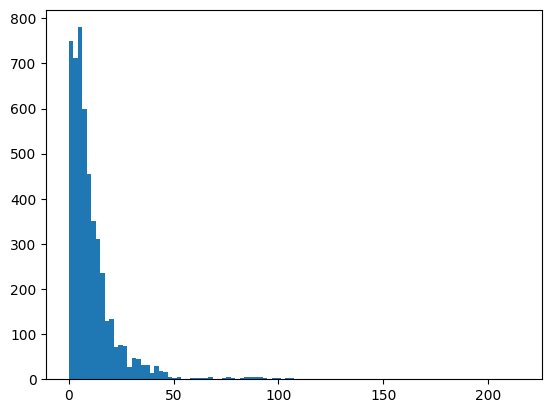

In [18]:
plt.hist(df_f['water_depth'], bins=100)
plt.show()

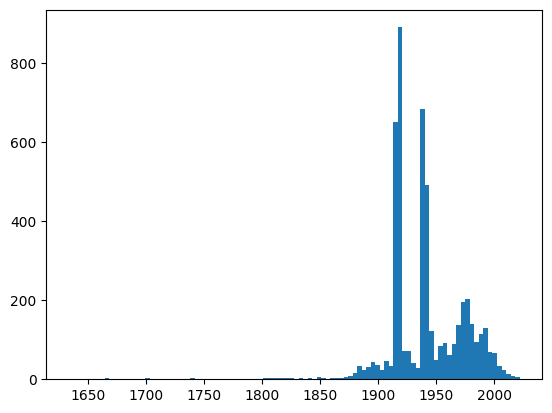

In [19]:
plt.hist(df_f['date_sunk_year'], bins=100)
plt.show()

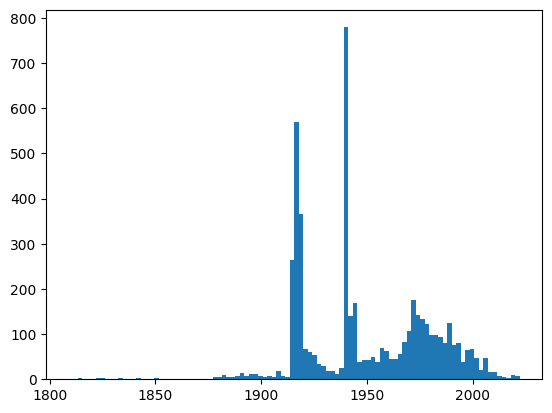

In [20]:
plt.hist(df_f['original_detection_year'], bins=100)
plt.show()

### Text Exploration

In [21]:
df.filter(pl.col("circumstances_of_loss").str.to_lowercase().str.contains("collision"))

circumstances_of_loss,surveying_details,general_comments,original_detection_year,date_sunk_year,water_depth,latitude,longitude
str,str,str,i64,i64,f64,str,str
"""SANK AFTER COLLISION WITH LOCA…","""HH550/404/06 26.3.98 UNCHA…",null,1998,1998,2.4384,"""22 17.453 N""","""114 8.432 E"""
"""10.2.88 VESSEL CAPSIZED AND …","""H2868/85 1.3.88 SANK AT KA…",null,1988,1988,6.4008,"""22 20 N""","""114 4 E"""
"""SANK AFTER COLLISION WITH M GE…","""HH548/436/04 19.3.99 SANK …",null,1999,1999,8.2296,"""22 15.872 N""","""114 26.71 E"""
"""VESSEL, SANK FOLLOWING A COLLI…","""HH548/350/01 20.12.89 SANK…",null,1989,1989,3.6576,"""22 16.16 N""","""114 16.15 E"""
"""SANK AFTER COLLISION WITH M TA…","""HH550/412/02 7.1.99 SANK I…",null,1998,1998,7.3152,"""22 9.108 N""","""114 12.5 E"""
…,…,…,…,…,…,…,…
"""VESSEL, BUILT 1951 BY N.V. KON…","""H6779/51 20.11.51 DANGEROU…",null,1951,1951,5.1816,"""53 54.758 N""","""7 52.274 E"""
"""BUILT 1924 BY NEW WATERWAY S.B…","""H7143/53 21.12.53 DW MASTS…",null,1953,1953,4.2672,"""53 52.508 N""","""7 55.041 E"""
"""SANK FOLLOWING COLLISION WITH …","""H1271/71 28.10.71 SUNK ABO…",null,1971,1971,3.6576,"""53 56.043 N""","""8 40.537 E"""


In [22]:
df.filter(pl.col("circumstances_of_loss").str.to_lowercase().str.contains("leakage"))

circumstances_of_loss,surveying_details,general_comments,original_detection_year,date_sunk_year,water_depth,latitude,longitude
str,str,str,i64,i64,f64,str,str
"""VESSEL REPORTED LEAKAGE WHILST…","""4.11.71 BEACHED WITH 25DEG L…",null,1971,1971,0.0,"""22 18 N""","""114 16 E"""
"""18.2.93 SANK FOLLOWING LEAKA…","""HH583/420/01 3.3.93 SANK I…",null,1993,1993,545.591983,"""8 33 S""","""158 47 E"""
"""BUILT IN 1971 BY KURUSHIMA DOC…","""H3449/80 23.8.84 SANK IN 2…",null,1984,1984,3.6576,"""18 50.683 N""","""72 45.243 E"""
"""BUILT IN 1960 BY N.V.KON. MAAT…","""15.6.80 SANK IN 44FT IN 1.3M…",null,1980,1980,3.6576,"""18 49.467 N""","""72 43.227 E"""
"""BUILT IN 1957 BY SANOYASU DOCK…","""18.5.76 VESSEL BEACHED IN E …",null,1976,1976,0.9144,"""18 45.15 N""","""72 50.06 E"""
…,…,…,…,…,…,…,…
"""3.9.99 HAD WATER LEAKAGE IN …","""14.9.99 GROUNDED ON SUBMERGE…",null,1999,1999,2.1336,"""22 10.05 N""","""91 39.82 E"""
"""SANK DUE TO LEAKAGE IN KEEL AN…","""HH527/680/02 9.11.93 REPD …","""Rep (1994)""",1993,1993,3.3528,"""0 58.676 S""","""117 21.107 E"""
"""SANK AFTER LEAKAGE INTO NO 4 H…","""HH371/460/02 23.12.98 SINK…",null,1998,1998,281.939991,"""36 51.824 N""","""13 15.101 E"""


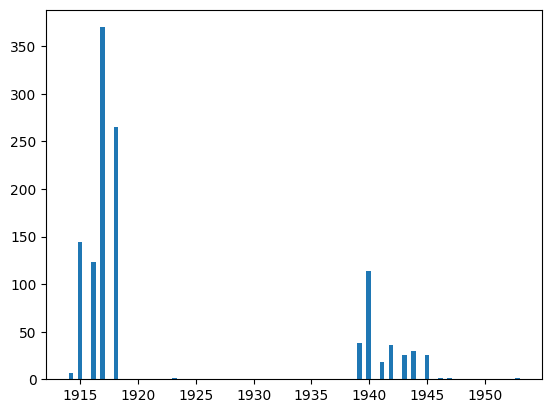

In [23]:
plt.hist(df.filter(pl.col("circumstances_of_loss").str.to_lowercase().str.contains("german submarine"))['date_sunk_year'], bins=100)
plt.show()